# Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. 
<br>Two types of risks are associated with the bank’s decision:
<br>
1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
<br>
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.
<br><br>
In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:<br>

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:<br>

* Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

* Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

* Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

# Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
<BR><BR>
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. <b>In this case, the customers labelled as 'charged-off' are the 'defaulters'. </b>
<BR><BR>
If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.
<BR><BR>
In other words, <b>the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.</b>  The company can utilise this knowledge for its portfolio and risk assessment. 
<BR><BR>
To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder


In [171]:

pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",100)

In [172]:
# load data file
data = pd.read_csv('loan.csv')

In [173]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,

In [174]:
data.shape

(39717, 111)

In [175]:
#check column details
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [176]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

#### Inights

*There are 111 columns having various data types like object, int, float and 305711 rows.

*There are many columns with 0 values or NULL values. We will exclude these columns from analysis

*There are columns with very hight values, columns related to amounts, standardising is required, will perform these task later in the notebook

## Missing value check

In [177]:
#percentage of missing values in columns
round((data.isnull().sum()*100/len(data)).sort_values(ascending = False),2)

verification_status_joint         100.00
annual_inc_joint                  100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_old_il_acct                100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt    

In [178]:
## list of columns where missing values are above 30%
nullcol_gt30 = (round((data.isnull().sum()*100/len(data)).sort_values(ascending = False),2))[round((data.isnull().sum()*100/len(data)).sort_values(ascending = False),2)>30]


In [179]:
print("Num of columns having missing values more than 30% :",len(nullcol_gt30))

Num of columns having missing values more than 30% : 58


In [180]:
nullcol_gt30

verification_status_joint         100.00
annual_inc_joint                  100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_old_il_acct                100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt    

In [181]:
# Create new dataframe to exclude columns where missing values are more than 30%
data1 = data.dropna(thresh=data.shape[0]*0.4, axis=1)

### Working on new dataframe


In [182]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [183]:
# Check missing values for remaining column
nullcol_gt0 = (round((data1.isnull().sum()*100/len(data1)).sort_values(ascending = False),2))[round((data1.isnull().sum()*100/len(data1)).sort_values(ascending = False),2)>30]


In [184]:
round((data1.isnull().sum()*100/len(data1)).sort_values(ascending = False),2)[round((data1.isnull().sum()*100/len(data1)).sort_values(ascending = False),2)>30]

desc    32.58
dtype: float64

In [185]:
nullcol_gt0

desc    32.58
dtype: float64

In [186]:
print("No of columns having missing values more than 0% :",len(nullcol_gt0))


No of columns having missing values more than 0% : 1


In [187]:
# dropping desc column as it is  not relevent  
data1.drop('desc',axis=1, inplace = True)


In [188]:
data1.shape


(39717, 53)

## Data Formating

In [189]:
# Remove alhabets and extra characters and convert to numeric
data1['emp_length'].head(2)

0    10+ years
1     < 1 year
Name: emp_length, dtype: object

In [190]:
# create new column 'emp_length_int' to get integer part from 'emp_legth' column, 
#possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
data1['emp_length_int'] = data1['emp_length'].str.replace(" years",'')
data1['emp_length_int'] = data1['emp_length_int'].str.replace(".*1 year",'0')
data1['emp_length_int'] = data1['emp_length_int'].str.replace("10\+",'10')

In [191]:
data1[['emp_length_int']]

,emp_length_int
0,10
1,0
2,10
3,10
4,0
...,...
39712,4
39713,3
39714,0
39715,0


In [192]:
# Converting column 'loan_status' to int

In [193]:
data1['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [194]:
## Convert column loan status
LE = LabelEncoder()
data1['loan_status_int'] = LE.fit_transform(data1['loan_status'])
data1['loan_status_int'] = pd.to_numeric(data1['loan_status_int'])

In [195]:
data1['loan_status_int'].unique()

array([2, 0, 1])

In [196]:
# Since all values are 0, dropping column chargeoff_within_12_mths

data1.drop('chargeoff_within_12_mths',axis=1, inplace = True)

### Checking interest rate column

In [197]:
# Cleantup -remove % sign and convert to int

data1['int_rate'] = data1['int_rate'].str.replace("%",'')

In [198]:
data1['int_rate'] = pd.to_numeric(data1['int_rate'] )

In [199]:
data1['int_rate'] .head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [200]:
data1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens',
       'emp_length_int', 'loan_status_int'],
      dtype='object')

# Univariate analysis

#### 1. Check loan status statistics

[32950  5627  1140]


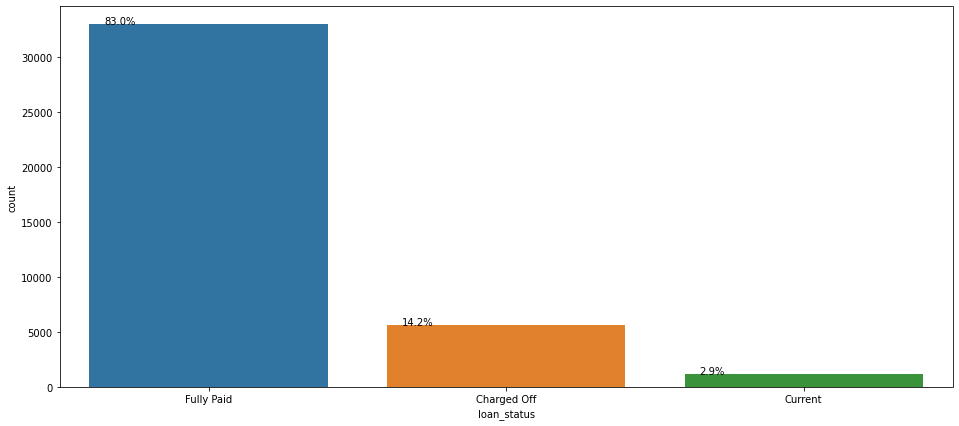

In [201]:
# Check Loan_status uI
col='loan_status'
fig, ax = plt.subplots()
fig.set_size_inches(16 , 7)
ax = sns.countplot(data = data1, x= col, order=data1[col].value_counts().index,hue = data1['loan_status']) 

abs_values = data1[col].value_counts(ascending=False).values
print(abs_values)

for p in ax.patches:
    #print(p)
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(data1))), (p.get_x()+0.05, p.get_height()+20))  

plt.show()
 

## Insights : 
14.2% customers are charged off 

## 2. Annual income of applicants

In [216]:
col='annual_inc'
data1['annual_inc'] = data1['annual_inc'].apply(lambda x: float(x))

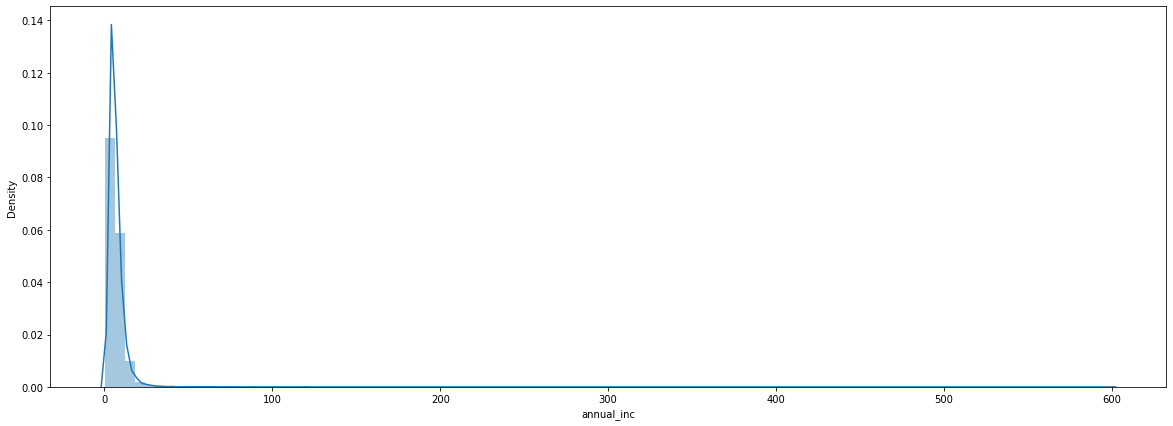

In [217]:
fig, ax = plt.subplots()
fig.set_size_inches(20 , 7)

ax = sns.distplot(data1[col], bins=100)

#### Insights:
Most of applicants have income less than 50000 

#### 3. Home ownership of applicants

<Axes: xlabel='count', ylabel='home_ownership'>

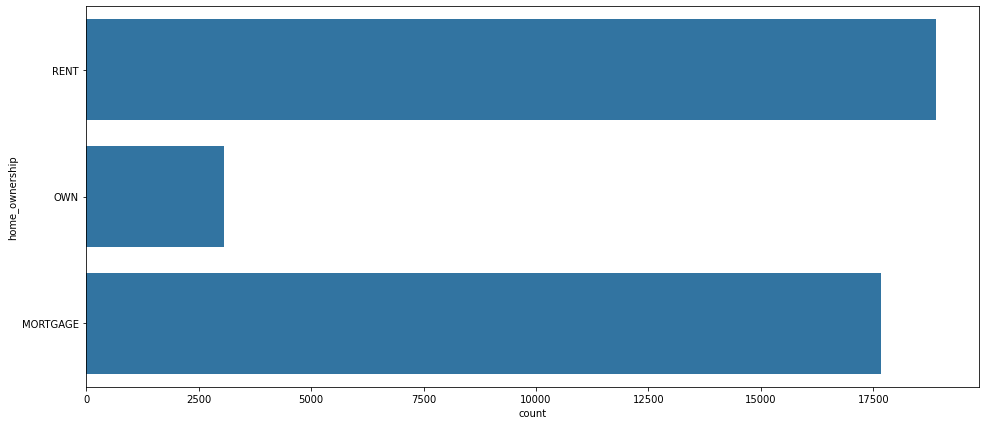

In [220]:
fig, ax = plt.subplots()
fig.set_size_inches(16 , 7)
sns.countplot(data1['home_ownership'])

#### Insights:
Most of the Applicants are staying on rent or has mortgage on their house

### 4. Purpose of loan

[18600  5119  3978  2971  2180  1818  1547   946   690   582   381   380
   322   102]


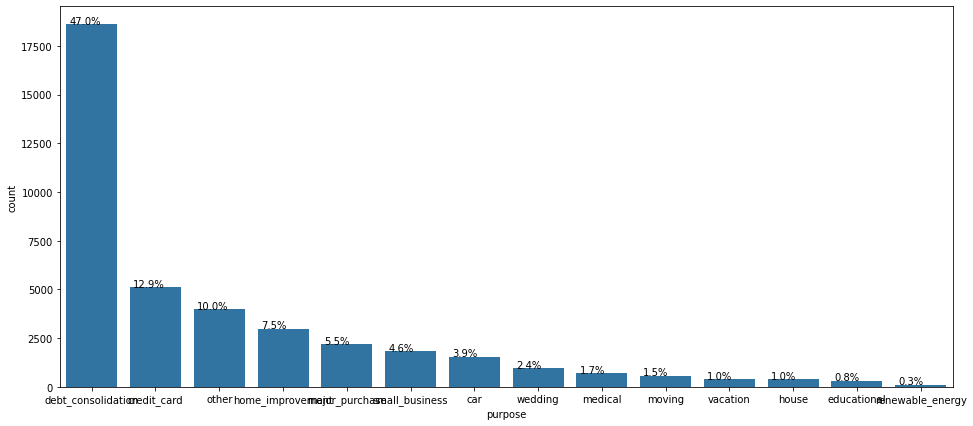

In [221]:
# Check loan purpose and 
col='purpose'
fig, ax = plt.subplots()
fig.set_size_inches(16 , 7)
ax = sns.countplot(data = data1, x= col, order=data1[col].value_counts().index) 

for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(data1))), (p.get_x()+0.05, p.get_height()+20))  


abs_values = data1[col].value_counts(ascending=False).values

print(abs_values)

#plt.show()

### Insights:
Majority of loan - 47% falls under debt consolidation category

# Bivariate Analysis

### 1. Home Ownership vs loan_status of aplicants

In [222]:
data1.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

In [223]:
data1.drop(data1[data1['home_ownership'].isin(['OTHER', 'NONE'])].index,inplace=True)
data1.home_ownership.unique()


array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

In [312]:
housse_df = data1[["home_ownership","loan_status"]]
g = housse_df.groupby("home_ownership")["loan_status"]
housse_df = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
housse_df['Percentage'] = housse_df['Percentage'].astype(str) +"%" 

In [313]:
housse_df

Counts Percentage
home_ownership loan_status                   
MORTGAGE       Fully Paid    14694     83.21%
               Charged Off    2327     13.18%
               Current         638      3.61%
OWN            Fully Paid     2532      82.8%
               Charged Off     443     14.49%
               Current          83      2.71%
RENT           Fully Paid    15641     82.76%
               Charged Off    2839     15.02%
               Current         419      2.22%

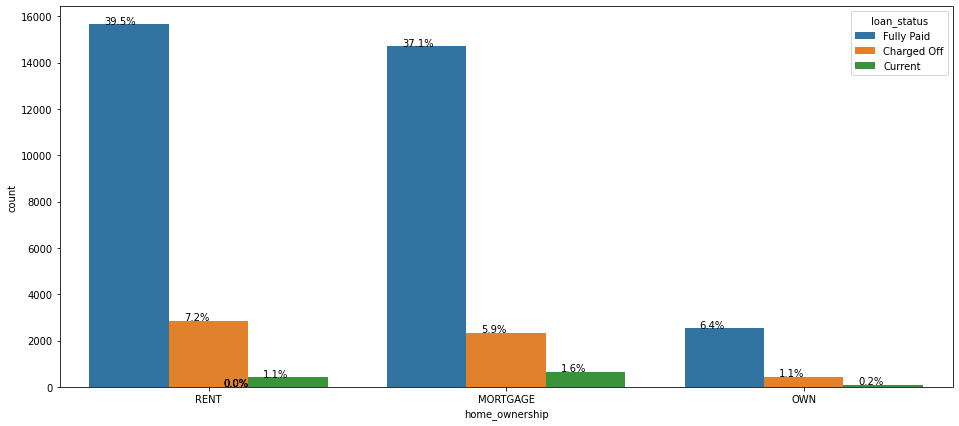

In [224]:
col='home_ownership'
fig, ax = plt.subplots()
fig.set_size_inches(16 , 7)
ax = sns.countplot(data = data1, x= col, order=data1[col].value_counts().index,hue = data1['loan_status']) 

abs_values = data1[col].value_counts(ascending=False).values
#print(abs_values)

# ax.bar_label(container=ax.containers[0], labels=abs_values)
# ax.bar_label(container=ax.containers[1], labels=abs_values)
# ax.bar_label(container=ax.containers[2], labels=abs_values)
for p in ax.patches:
    #print(p)
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(data1))), (p.get_x()+0.05, p.get_height()+20))  

plt.show()

### Insights:
Approx 48% of applicatns live in rented home and 45% of applicants have mortgage on their house.
Most of the defulters have rented house.

### 2. Employment length of applicant

In [225]:
data1.emp_length_int.unique()
data1['emp_length_int'] = pd.to_numeric(data1['emp_length_int'])

In [226]:
bins = [2,4,6,8,10]
data1['emp_length_binned'] = pd.cut(data1['emp_length_int'], bins)
data1['emp_length_binned'].head()

0    (8.0, 10.0]
1            NaN
2    (8.0, 10.0]
3    (8.0, 10.0]
4            NaN
Name: emp_length_binned, dtype: category
Categories (4, interval[int64, right]): [(2, 4] < (4, 6] < (6, 8] < (8, 10]]

In [301]:
emp_df = data1[["emp_length_binned","loan_status"]]
g = emp_df.groupby("emp_length_binned")["loan_status"]
emp_df = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
emp_df['Percentage'] = emp_df['Percentage'].astype(str) +"%" 

In [304]:

emp_df

Counts Percentage
emp_length_binned loan_status                   
(2, 4]            Fully Paid     6323     84.15%
                  Charged Off    1014     13.49%
                  Current         177      2.36%
(4, 6]            Fully Paid     4588      83.4%
                  Charged Off     764     13.89%
                  Current         149      2.71%
(6, 8]            Fully Paid     2674      82.4%
                  Charged Off     465     14.33%
                  Current         106      3.27%
(8, 10]           Fully Paid     8211     81.15%
                  Charged Off    1484     14.67%
                  Current         423      4.18%

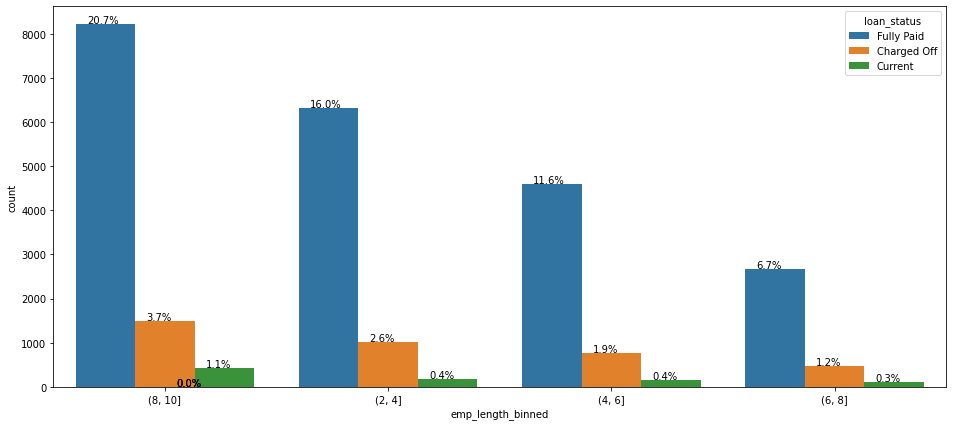

In [227]:
col='emp_length_binned'
fig, ax = plt.subplots()
fig.set_size_inches(16 , 7)
ax = sns.countplot(data = data1, x= col, order=data1[col].value_counts().index,hue = data1['loan_status']) 

abs_values = data1[col].value_counts(ascending=False).values
#print(abs_values)

for p in ax.patches:
    #print(p)
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(data1))), (p.get_x()+0.05, p.get_height()+20))  

plt.show()

### Insights:
There is not muuch difference with respect to employment length

#### 3. Application verification status vs loan satus

In [271]:
sub_df = data1[['verification_status','loan_status']]

In [272]:
g = sub_df.groupby("verification_status")["loan_status"]
sub_df = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))

In [273]:
sub_df
sub_df['Percentage'] = sub_df['Percentage'].astype(str) +"%" 

In [282]:
sub_df.reset_index(inplace=True)

In [283]:
sub_df

,verification_status,loan_status,Counts,Percentage
0,Not Verified,Fully Paid,14507,86.01%
1,Not Verified,Charged Off,2132,12.64%
2,Not Verified,Current,227,1.35%
3,Source Verified,Fully Paid,8234,82.53%
4,Source Verified,Charged Off,1433,14.36%
5,Source Verified,Current,310,3.11%
6,Verified,Fully Paid,10126,79.28%
7,Verified,Charged Off,2044,16.0%
8,Verified,Current,603,4.72%


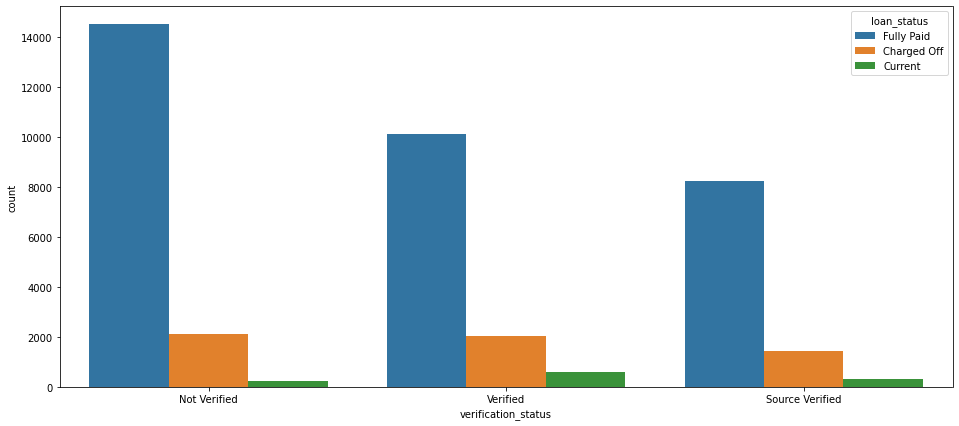

In [295]:
col='verification_status'
fig, ax = plt.subplots()
fig.set_size_inches(16 , 7)
ax = sns.countplot(data = data1, x= col, order=data1[col].value_counts().index,hue = data1['loan_status']) 

abs_values = data1[col].value_counts(ascending=False).values
#print(abs_values)



### Insights:
From not verified, around 86% applicants fully repaid loan, apund 12.64% charged off
Charged off prcentage is higher 16% in Source verified category, compared to other two. 

In [ ]:
sub_df
sub_df['Percentage'] = sub_df['Percentage'].astype(str) +"%" 

In [64]:
data1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'emp_length_int',
       'loan_status_int', 'emp_title_code', 'emp_length_binned'],
      dtype='object')

In [107]:
colnames_numerics_only = data1.select_dtypes(include=np.number).columns
columns_objects_only = data1.select_dtypes(['object']).columns



In [108]:
print(colnames_numerics_only)
print(columns_objects_only)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens',
       'emp_length_int', 'loan_status_int', 'emp_title_code'],
      dtype='object')
Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')


#### 4. Relationship between Annual income and loan status

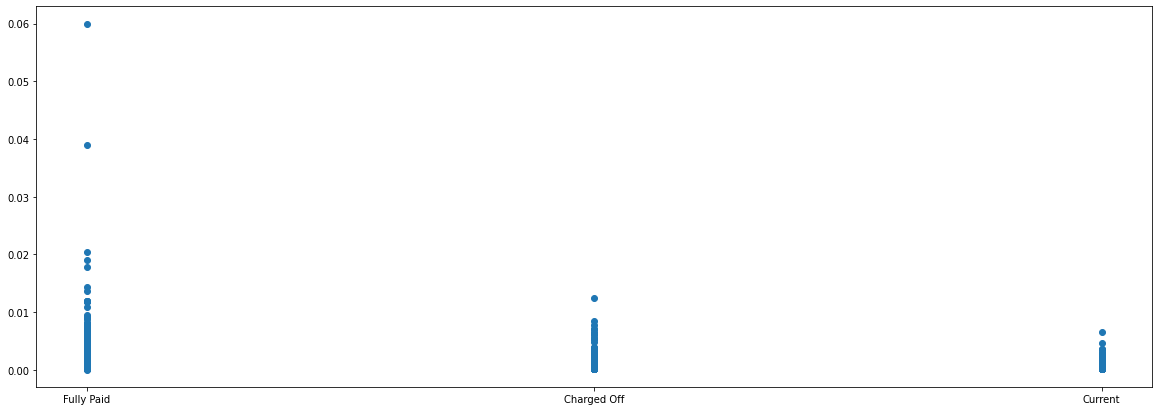

In [237]:
fig, ax = plt.subplots()
fig.set_size_inches(20 , 7)
ax.ticklabel_format(style='plain')
ax.scatter(data1['loan_status'], data1['annual_inc'])
#plt.margins(x=0.5)


#### Insights:
Charged-off accounts are having annual income below $2000000 aproximately

#### 5. Relationship between loan purpose and loan status

<Axes: xlabel='purpose', ylabel='count'>

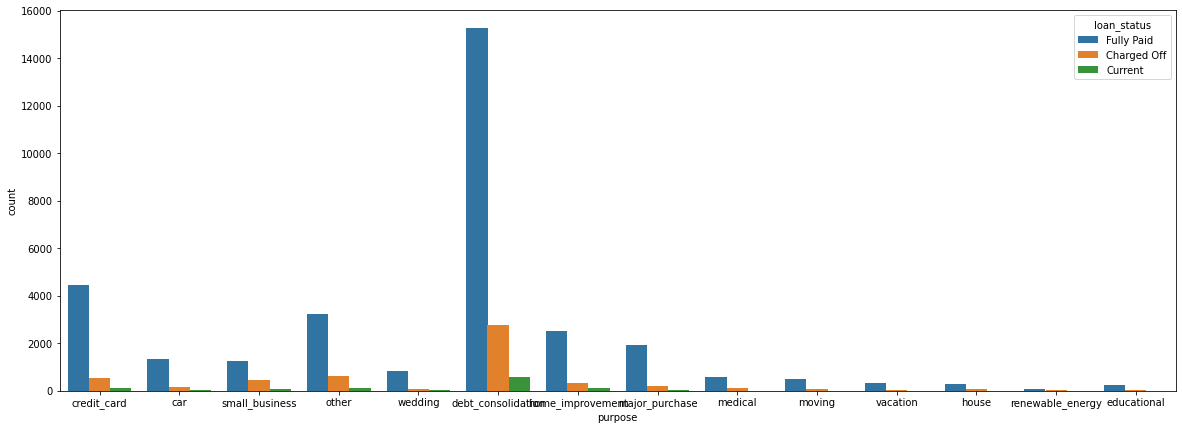

In [238]:
fig, ax = plt.subplots()
fig.set_size_inches(20 , 7)
#sns.countplot(data=data1, x='loan_status', hue='purpose')

sns.countplot(data=data1, x='purpose', hue='loan_status')

### Check Correlation between multiple variables

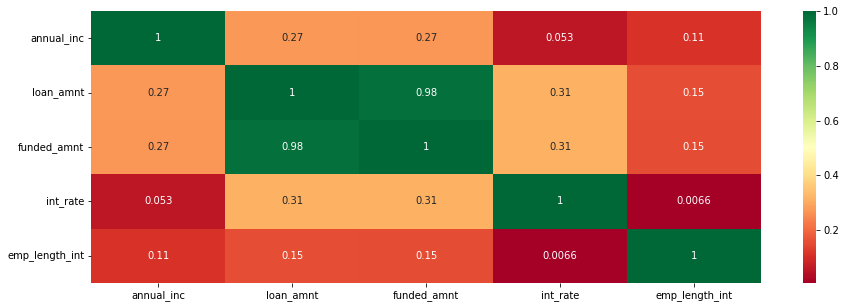

In [239]:
corrb_columns = data1[['annual_inc', 'loan_amnt','funded_amnt','int_rate','emp_length_int']]
corrf = corrb_columns.corr()
fig, ax = plt.subplots(figsize=(15,5))         # Sample figsize in inches
x = sns.heatmap(corrf,
            annot = True,
            cmap ="RdYlGn")


In [69]:
corrf

,annual_inc,loan_amnt,funded_amnt,int_rate
annual_inc,1.000000,0.271106,0.266896,0.053178
loan_amnt,0.271106,1.000000,0.981660,0.309266
funded_amnt,0.266896,0.981660,1.000000,0.312540
int_rate,0.053178,0.309266,0.312540,1.000000


### Insights :
1. There is strong correlation between funded amount and loan amout
2. Loan amount and funded amout shows positive correlation with Annual income
3. Correlation is less between employment length and annual income, loan amoun and funded amount.

## Conclusion

<b>Decisive Factor whether an applicant will be defaulter:</b>
* Annual_income: Annual income below 150000 have more defaults. 
* Verification status: Source verification has less defaults than not verified and verified.
* Housing status with Rent is having more defaults. 
